## PRICE REGRESSION MODELLING

* Linear Regressor
* Random Forest
* Gradient Boosting
* XG Boost
* Light GBM Regressor con selección de hiperparámetros

Se realizará un modelo sencillo que tenga en cuenta variables que, a priori, pudieran ser conocidas por parte de un fondo a la hora de buscar la estimación del precio por noche.

Librerías

In [35]:
import numpy as np
from sklearn.decomposition import PCA
from urllib.parse import urlencode
import pandas as pd
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import math
from plotly.subplots import make_subplots

import importlib.machinery
import importlib.util
import logging
import os
import sys
from pathlib import Path

pio.renderers.default = 'vscode'
pio.templates.default = 'plotly'

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize


import plotly.figure_factory as ff

import geopandas 
import json

from cv2 import mean
from itertools import count

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from scipy.stats import uniform, randint

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

import re
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import ipywidgets as widgets
from plotly.offline import init_notebook_mode
from ipywidgets import interact, interactive, fixed, interact_manual
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
import lightgbm as lgb
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
import pickle

pd.set_option('display.max_columns', None)

Importación de datos filtrados

In [2]:
listings_filtered_df = pd.read_parquet("../Data/total data/modified data/listingsFinalConRentabilidad.parquet")
pd.options.display.max_columns = None
listings_filtered_df.head()

,id,last_scraped,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,years_permanency,baths,price per unit,occupancy_rate,revenue,profitability,amenities_lower,has_wifi,has_dryer,has_tv,has_heating,has_kitchen
0,2539,2022-09-07,2787,John,2008-09-07,within an hour,100,90,f,Gravesend,9.0,12.0,t,t,Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""First aid kit"", ""Microwave"", ""Stove"", ""Coffe...",299.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,21,51,81,356,9,0,0,2015-12-04,2018-10-19,4.89,4.88,5.00,5.00,5.00,4.75,4.88,None,f,9,1,6,2,0.11,14.219178,1.0,4.418201e+05,0.111236,12139.735955,0.027477,"[""first aid kit"", ""microwave"", ""stove"", ""coffe...",1,1,1,1,1
1,2595,2022-09-07,2845,Jennifer,2008-09-09,within a day,75,23,f,Midtown,6.0,9.0,t,t,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Stove"", ""Coffee maker"", ""Long term stays all...",175.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,5,280,49,1,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.80,4.81,4.40,None,f,3,3,0,0,0.31,14.213699,1.0,5.095289e+06,0.398571,25458.750000,0.004997,"[""stove"", ""coffee maker"", ""long term stays all...",1,1,1,1,1
2,5121,2022-09-07,7356,Garon,2009-02-03,within an hour,100,100,t,Bedford-Stuyvesant,2.0,2.0,t,t,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,None,1.0,1.0,"[""Heating"", ""Kitchen"", ""Air conditioning"", ""Wi...",60.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,5,30,60,335,50,0,0,2009-05-28,2019-12-02,4.52,4.22,4.09,4.91,4.91,4.47,4.52,None,f,2,0,2,0,0.31,13.810959,0.0,2.552823e+05,0.333134,7295.641791,0.028579,"[""heating"", ""kitchen"", ""air conditioning"", ""wi...",1,0,0,1,1
3,45910,2022-09-07,204539,Mark,2010-08-17,within an hour,100,19,f,Ridgewood,7.0,7.0,t,t,Ridgewood,Queens,40.70309,-73.89963,Entire townhouse,Entire home/apt,16,NaN,2.5 baths,5.0,10.0,"[""Hair dryer"", ""Essentials"", ""Carbon monoxide ...",425.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,13,0,0,2012-01-03,2019-11-12,4.42,4.64,4.36,4.82,5.00,4.82,4.55,None,f,6,6,0,0,0.10,12.276712,2.5,3.830991e+05,0.098630,15300.000000,0.039937,"[""hair dryer"", ""essentials"", ""carbon monoxide ...",1,1,1,1,1
4,5136,2022-09-07,7378,Rebecca,2009-02-03,None,None,33,f,Greenwood Heights,1.0,5.0,t,t,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,NaN,1.5 baths,2.0,2.0,"[""Hair dryer"", ""Cable TV"", ""Refrigerator"", ""BB...",275.0,21,1125,21.0,21.0,1125.0,1125.0,21.0,1125.0,NaN,t,0,0,0,179,3,1,1,2014-01-02,2022-08-10,5.00,5.00,5.00,5.00,5.00,4.67,5.00,None,f,1,1,0,0,0.03,13.810959,1.5,3.286703e+05,0.042235,4239.301676,0.012898,"[""hair dryer"", ""cable tv"", ""refrigerator"", ""bb...",1,1,1,1,1


In [3]:
listings_filtered_df.columns

Index(['id', 'last_scraped', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       '

### MODELADO

Seleccionamos las variables que de primeras pensamos que son más influyentes en el precio de los Airbnb en la ciudad de Nueva York y entrenamos un modelo con estas variables

*Las variables que hemos escogido son: latitude, longitude, neighobourhood_group_cleansed, accomodates, beds, baths, amenities*

*Vamos a crear variables dummies en las amenities más repetidas (sacadas del wordcloud el EDA) que son wifi, dryer, TV, heating, kitchen*

Selección de variables finales para el modelo

In [4]:
data_model = listings_filtered_df[["price","latitude","longitude","neighbourhood_group_cleansed","accommodates","beds","baths","has_wifi","has_dryer","has_heating","has_kitchen","has_tv"]]
data_model.head()

,price,latitude,longitude,neighbourhood_group_cleansed,accommodates,beds,baths,has_wifi,has_dryer,has_heating,has_kitchen,has_tv
0,299.0,40.64529,-73.97238,Brooklyn,2,1.0,1.0,1,1,1,1,1
1,175.0,40.75356,-73.98559,Manhattan,1,1.0,1.0,1,1,1,1,1
2,60.0,40.68535,-73.95512,Brooklyn,2,1.0,0.0,1,0,1,1,0
3,425.0,40.70309,-73.89963,Queens,16,10.0,2.5,1,1,1,1,1
4,275.0,40.66265,-73.99454,Brooklyn,4,2.0,1.5,1,1,1,1,1


In [5]:
# creacion de dummmies
data_model_num = pd.get_dummies(data_model, columns = ["neighbourhood_group_cleansed"])
data_model_num.head()

,price,latitude,longitude,accommodates,beds,baths,has_wifi,has_dryer,has_heating,has_kitchen,has_tv,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island
0,299.0,40.64529,-73.97238,2,1.0,1.0,1,1,1,1,1,0,1,0,0,0
1,175.0,40.75356,-73.98559,1,1.0,1.0,1,1,1,1,1,0,0,1,0,0
2,60.0,40.68535,-73.95512,2,1.0,0.0,1,0,1,1,0,0,1,0,0,0
3,425.0,40.70309,-73.89963,16,10.0,2.5,1,1,1,1,1,0,0,0,1,0
4,275.0,40.66265,-73.99454,4,2.0,1.5,1,1,1,1,1,0,1,0,0,0


In [6]:
data_model_num.isna().sum()

price                                           0
latitude                                        0
longitude                                       0
accommodates                                    0
beds                                          322
baths                                           0
has_wifi                                        0
has_dryer                                       0
has_heating                                     0
has_kitchen                                     0
has_tv                                          0
neighbourhood_group_cleansed_Bronx              0
neighbourhood_group_cleansed_Brooklyn           0
neighbourhood_group_cleansed_Manhattan          0
neighbourhood_group_cleansed_Queens             0
neighbourhood_group_cleansed_Staten Island      0
dtype: int64

*Se observa que solo hay valores NA en el número de camas por lo que dropeamos esas observaciones*

In [7]:
# quito los na 
data_model_num = data_model_num.dropna()

In [8]:
data_model_num.columns

Index(['price', 'latitude', 'longitude', 'accommodates', 'beds', 'baths',
       'has_wifi', 'has_dryer', 'has_heating', 'has_kitchen', 'has_tv',
       'neighbourhood_group_cleansed_Bronx',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Manhattan',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Staten Island'],
      dtype='object')

Split

*Realizamos una división de los datos de manera que haya un 70% en train, un 15% en test y un 15% en validación*

In [9]:
df_train, df_test  = train_test_split(data_model_num,
                                test_size=0.3,
                                random_state = 101)

In [10]:
df_test, df_validation  = train_test_split(df_test,
                                test_size=0.5,
                                random_state = 101)

In [11]:
#division entre train y test 
X_train = df_train.drop("price", axis = 1)
y_train = df_train["price"]

X_test = df_test.drop("price", axis = 1)
y_test = df_test["price"]

X_val = df_validation.drop("price", axis = 1)
y_val = df_validation["price"]

Funciones

*Se crean unas funciones que devuelvan métricas y gráficos significativos para valorar el fit del modelo*

In [78]:
def show_metrics(prediction_test, prediction_train, y_test, y_train, y_val):
    MAE = round(metrics.mean_absolute_error(y_val, prediction_test), 2)
    MSE = round(metrics.mean_squared_error(y_val, prediction_test), 2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_val, prediction_test)), 2)
    RMSE_ratio_test= round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)) / np.mean(y_test),3)
    RMSE_ratio_train = round(np.sqrt(metrics.mean_squared_error(y_train, prediction_train)) / np.mean(y_train),3)
    R_2_test = round(metrics.explained_variance_score(y_test, prediction_test), 2)
    R_2_train = round(metrics.explained_variance_score(y_train, prediction_train), 2)
    
    metrics_data = pd.DataFrame(data = [MAE, MSE, RMSE, RMSE_ratio_test, 
                                    RMSE_ratio_train, R_2_test, R_2_train]).T
    
    metrics_data.columns = ['MAE', 'MSE', 'RMSE', 'RMSE_ratio_test', 
                                    'RMSE_ratio_train', 'R_2_test', 'R_2_train']
    display(metrics_data)

In [81]:
def analysis(model, X_train, X_test, y_train, y_test,y_val):
    
    prediction_test = model.predict(X_test)
    prediction_train = model.predict(X_train)
        
    
    show_metrics(prediction_test, prediction_train, y_test, y_train, y_val)
    
    sns.regplot(x = y_test, y = prediction_test, fit_reg=True)
    plt.title('Prediction and real')
    plt.show()

    sns.distplot(y_test - prediction_test, bins = 50)
    plt.title('Error variance')
    plt.show()

#### Linear Regressor

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,132.82,36010.22,189.76,0.587,0.64,0.41,0.4


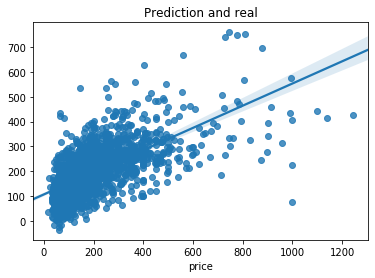

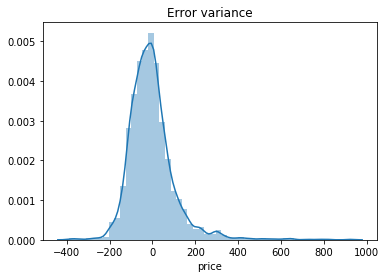

In [83]:
lm = LinearRegression(
        n_jobs = -1,
        normalize = True
)

lm.fit(X_train, y_train)

comment = ''

analysis(
    model = lm, 
    X_train = X_train, 
    X_test = X_test, 
    y_train = y_train, 
    y_test = y_test,
    y_val = y_val
)

*El regresor lineal no es un modelo que prediga de forma precisa el precio por noche de los Airbnb, por lo que lo descartamos*

#### Random Forest Regressor

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,135.48,38701.61,196.73,0.495,0.419,0.58,0.74


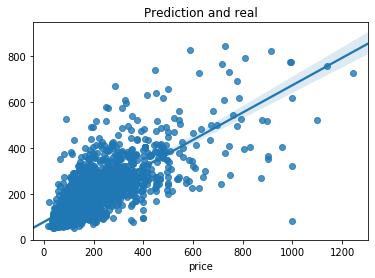

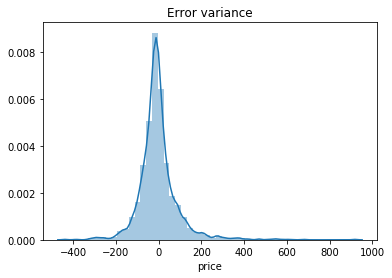

In [84]:
rfm = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          random_state = 101,
          n_estimators = 700
    
)
rfm.fit(X_train, y_train)

comment = ''

analysis(
    model = rfm, 
    X_train =X_train, 
    X_test = X_test, 
    y_train = y_train, 
    y_test = y_test,
    y_val = y_val
    
)

In [85]:
importancia_predictores = pd.DataFrame(
                            {'predictor': data_model_num.drop(columns = "price").columns,
                             'importancia': rfm.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
importancia_predictores = importancia_predictores.sort_values('importancia', ascending=False).head(10).reset_index()
importancia_predictores

Importancia de los predictores en el modelo


,index,predictor,importancia
0,2,accommodates,0.280264
1,1,longitude,0.266622
2,0,latitude,0.198532
3,4,baths,0.149577
4,12,neighbourhood_group_cleansed_Manhattan,0.036735
5,3,beds,0.022918
6,8,has_kitchen,0.020624
7,9,has_tv,0.012012
8,6,has_dryer,0.004255
9,7,has_heating,0.003864


In [86]:
# visualizacion de la importancia mediante un grafico de barras
data = [
    go.Bar(
        y = importancia_predictores["predictor"],
        x = importancia_predictores["importancia"],
        marker_color = "steelblue",
        orientation='h',
        name = "Importancia de variables"
    )      
]

layout = go.Layout(title = "Importancia de variables en el Random Forest", xaxis_title = "Importancia", yaxis_title = "Variables")

fig = go.Figure(data = data, layout = layout)

fig.show()

#### Random Forest Regressor con selección de hiperparámetros

In [57]:
# hyperparameter tuning

def regression_tuning(params:dict):
    ''' 
    Parametros:
    
        params: dict. Diccionario que contiene los hiperparametros a tunear del modelo
    
    Salida:
        
        resultados: dict. Diccionario que contiene las métricas y el modelo 
    '''
    
    # for key in ["num_leaves","min_child_samples"]:
    #     params[key] = int(params[key])
    
    model = RandomForestRegressor(n_estimators = 100, random_state = 123, **params)
    
    model.fit(X_train, y_train, 
                #eval_set = (X_val,y_val)
                # , eval_metric = ["MAE","MSE","RMSE"],
                #         callbacks=[lgb.callback.log_evaluation(period = 50), lgb.early_stopping(5)]
            )
    
    y_pred = model.predict(X_val)
    
    #loss = accuracy_score(y_val, y_pred)
    MAE = round(metrics.mean_absolute_error(y_val, y_pred), 2)
    MSE = round(metrics.mean_squared_error(y_val, y_pred), 2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_val, y_pred)), 2)
    R2 = round(metrics.explained_variance_score(y_val, y_pred), 2)
    print("El MAE para este ensayo es: {}".format(round(MAE,4)))
    print("El MSE para este ensayo es: {}".format(round(MSE,4)))
    print("El RMSE para este ensayo es: {}".format(round(RMSE,4)))
    print("El R2 para este ensayo es: {}".format(round(R2,4)))
    print("\n")
    
    return {"loss": RMSE, "status": STATUS_OK, "model": model}

In [36]:
len(X_train)

10470

Tenemos una muestra de 10.470 observaciones, valor que emplearemos para definir los valores entre los que tunean los hiperparámetros del modelo

In [88]:
space = {
    "max_depth": hp.choice("max_depth",[4,5,6,7,8,9,15,10,15,20]),
    "min_samples_split": hp.choice("min_samples_split",[10,20,30,40,50,60,70,80,90,100]),
    "min_samples_leaf": hp.choice("min_samples_leaf",[10,20,30,40,50,60,70,80,90,100]),
}

In [89]:
trials = Trials()
best = fmin(regression_tuning, space, algo=tpe.suggest, max_evals = 25,trials = trials)

El MAE para este ensayo es: 69.15                     
El MSE para este ensayo es: 12423.86                  
El RMSE para este ensayo es: 111.46                   
El R2 para este ensayo es: 0.51                       
El MAE para este ensayo es: 65.73                                   
El MSE para este ensayo es: 11627.3                                 
El RMSE para este ensayo es: 107.83                                 
El R2 para este ensayo es: 0.54                                     
El MAE para este ensayo es: 60.34                                   
El MSE para este ensayo es: 10181.2                                 
El RMSE para este ensayo es: 100.9                                  
El R2 para este ensayo es: 0.6                                      
El MAE para este ensayo es: 69.51                                   
El MSE para este ensayo es: 12777.59                               
El RMSE para este ensayo es: 113.04                                
El R2 para este ensayo 

In [92]:
results = pd.DataFrame(columns = ["max_depth","min_samples_split","min_samples_leaf","RMSE"])

models = []
for trial in trials:
    results = results.append(pd.Series(
            {
             "max_depth": trial["result"]["model"].max_depth,
             "min_samples_split": trial["result"]["model"].min_samples_split,
             "min_samples_leaf": trial["result"]["model"].min_samples_leaf,
             "RMSE": trial["result"]["loss"]
            }
        ),
        ignore_index = True
    )
    models.append(trial["result"]["model"])
    
results.sort_values("RMSE",ascending = True)

,max_depth,min_samples_split,min_samples_leaf,RMSE
2,20.0,10.0,10.0,100.90
11,15.0,30.0,10.0,101.25
20,20.0,60.0,10.0,103.12
21,9.0,30.0,10.0,103.54
24,20.0,90.0,10.0,105.16
4,15.0,80.0,30.0,106.16
19,20.0,100.0,20.0,106.37
8,15.0,50.0,40.0,107.02
15,15.0,10.0,40.0,107.02
14,15.0,40.0,40.0,107.02


In [93]:
model = models[2]

In [95]:
importancia_predictores = pd.DataFrame(
                            {'predictor': data_model_num.drop(columns = "price").columns,
                             'importancia': model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
importancia_predictores = importancia_predictores.sort_values('importancia', ascending=False).head(10).reset_index()
importancia_predictores

Importancia de los predictores en el modelo


,index,predictor,importancia
0,2,accommodates,0.301293
1,1,longitude,0.266709
2,0,latitude,0.194060
3,4,baths,0.151353
4,12,neighbourhood_group_cleansed_Manhattan,0.040645
5,8,has_kitchen,0.019064
6,9,has_tv,0.010920
7,3,beds,0.010493
8,6,has_dryer,0.002907
9,13,neighbourhood_group_cleansed_Queens,0.001136


In [96]:
# visualizacion de la importancia mediante un grafico de barras
data = [
    go.Bar(
        y = importancia_predictores["predictor"],
        x = importancia_predictores["importancia"],
        marker_color = "steelblue",
        orientation='h',
        name = "Importancia de variables"
    )      
]

layout = go.Layout(title = "Importancia de variables en el Random Forest", xaxis_title = "Importancia", yaxis_title = "Variables")

fig = go.Figure(data = data, layout = layout)

fig.show()

#### Gradient Boosting Regressor

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,134.63,37694.97,194.15,0.508,0.538,0.56,0.58


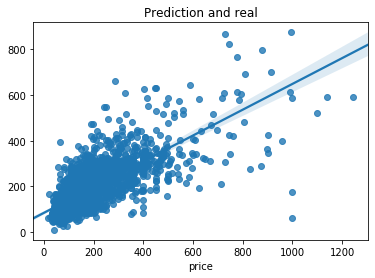

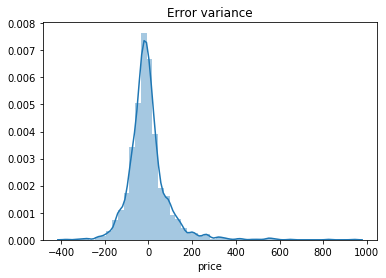

In [90]:
gbr_model = GradientBoostingRegressor(random_state = 101)
gbr_model.fit(X_train, y_train)

comment = ''

analysis(
    model = gbr_model, 
    X_train = X_train, 
    X_test = X_test,
    y_train = y_train, 
    y_test = y_test,
    y_val = y_val
)

In [30]:
importancia_predictores = pd.DataFrame(
                            {'predictor': data_model_num.drop(columns = "price").columns,
                             'importancia': gbr_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
importancia_predictores = importancia_predictores.sort_values('importancia', ascending=False).head(10).reset_index()
importancia_predictores 

Importancia de los predictores en el modelo


,index,predictor,importancia
0,2,accommodates,0.354700
1,1,longitude,0.253209
2,4,baths,0.156411
3,0,latitude,0.127316
4,12,neighbourhood_group_cleansed_Manhattan,0.071117
5,8,has_kitchen,0.015475
6,9,has_tv,0.010780
7,3,beds,0.007646
8,6,has_dryer,0.002172
9,7,has_heating,0.000660


In [31]:
# visualizacion de la importancia mediante un grafico de barras
data = [
    go.Bar(
        y = importancia_predictores["predictor"],
        x = importancia_predictores["importancia"],
        marker_color = "steelblue",
        orientation='h',
        name = "Importancia de variables"
    )      
]

layout = go.Layout(title = "Importancia de variables en el Gradient Boosting Regressor", xaxis_title = "Importancia", yaxis_title = "Variables")

fig = go.Figure(data = data, layout = layout)

fig.show()

#### XGB Regressor

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,134.63,37694.97,194.15,0.508,0.538,0.56,0.58


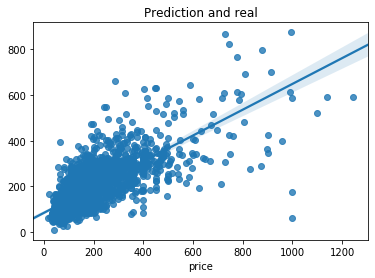

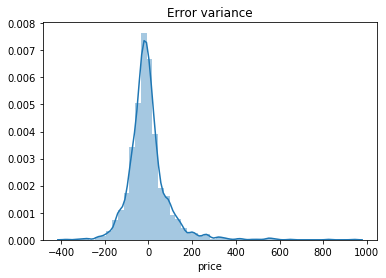

In [91]:
xg_model = xgb.XGBRegressor(random_state = 101)
xg_model.fit(X_train, y_train)

comment = ''

analysis(
    model = gbr_model, 
    X_train = X_train, 
    X_test = X_test,
    y_train = y_train, 
    y_test = y_test,
    y_val = y_val
)

In [33]:
importancia_predictores = pd.DataFrame(
                            {'predictor': data_model_num.drop(columns = "price").columns,
                             'importancia': xg_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
importancia_predictores = importancia_predictores.sort_values('importancia', ascending=False).head(10).reset_index()
importancia_predictores

Importancia de los predictores en el modelo


,index,predictor,importancia
0,12,neighbourhood_group_cleansed_Manhattan,0.456437
1,4,baths,0.149452
2,2,accommodates,0.116020
3,8,has_kitchen,0.061558
4,9,has_tv,0.048077
5,1,longitude,0.038994
6,0,latitude,0.027520
7,11,neighbourhood_group_cleansed_Brooklyn,0.021880
8,5,has_wifi,0.016700
9,3,beds,0.016414


In [34]:
# visualizacion de la importancia mediante un grafico de barras
data = [
    go.Bar(
        y = importancia_predictores["predictor"],
        x = importancia_predictores["importancia"],
        marker_color = "steelblue",
        orientation='h',
        name = "Importancia de variables"
    )      
]

layout = go.Layout(title = "Importancia de variables en el XG Boost", xaxis_title = "Importancia", yaxis_title = "Variables")

fig = go.Figure(data = data, layout = layout)

fig.show()

#### Light GBM

In [16]:
# hyperparameter tuning

def regression_tuning(params:dict):
    ''' 
    Parametros:
    
        params: dict. Diccionario que contiene los hiperparametros a tunear del modelo
    
    Salida:
        
        resultados: dict. Diccionario que contiene las métricas y el modelo 
    '''
    
    for key in ["num_leaves","min_child_samples"]:
        params[key] = int(params[key])
    
    model = lgb.LGBMRegressor(n_estimators=500, importance_type = 'gain', random_state = 123, **params)
    
    model.fit(X_train, y_train, eval_set = (X_val,y_val), eval_metric = ["MAE","MSE","RMSE"],
              callbacks=[lgb.callback.log_evaluation(period = 50), lgb.early_stopping(5)])
    
    y_pred = model.predict(X_val)
    
    #loss = accuracy_score(y_val, y_pred)
    MAE = round(metrics.mean_absolute_error(y_val, y_pred), 2)
    MSE = round(metrics.mean_squared_error(y_val, y_pred), 2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_val, y_pred)), 2)
    R2 = round(metrics.explained_variance_score(y_val, y_pred), 2)
    print("El MAE para este ensayo es: {}".format(round(MAE,4)))
    print("El MSE para este ensayo es: {}".format(round(MSE,4)))
    print("El RMSE para este ensayo es: {}".format(round(RMSE,4)))
    print("El R2 para este ensayo es: {}".format(round(R2,4)))
    print("\n")
    
    return {"loss": RMSE, "status": STATUS_OK, "model": model}

#eval_metric = ["MAE","MSE","RMSE"]

In [17]:
len(X_train)

10470

Tenemos una muestra de 10.470 observaciones, valor que emplearemos para definir los valores entre los que tunean los hiperparámetros del modelo

In [18]:
space = {
    "max_depth": hp.choice("max_depth",[4,5,6,7,8,9,10]),
    "learning_rate": hp.uniform("learning_rate",0.01,0.2),
    "num_leaves": hp.quniform("num_leaves",20,50,1),
    "min_child_samples": hp.quniform("min_child_samples", 5, 30, 1),
    "reg_alpha": hp.uniform("reg_alpha",0,2),
    "reg_lambda": hp.uniform("reg_lambda", 0,2)
}

In [19]:
trials = Trials()
best = fmin(regression_tuning,space, algo=tpe.suggest, max_evals = 50,trials = trials)

Training until validation scores don't improve for 5 rounds
[50]	valid_0's l1: 62.9723	valid_0's l2: 10502.4	valid_0's rmse: 102.481
[100]	valid_0's l1: 60.8177	valid_0's l2: 9998.49	valid_0's rmse: 99.9925
[150]	valid_0's l1: 60.1485	valid_0's l2: 9760.51	valid_0's rmse: 98.7953
Early stopping, best iteration is:                    
[167]	valid_0's l1: 59.863	valid_0's l2: 9664.47	valid_0's rmse: 98.3081
El MAE para este ensayo es: 59.86                     
El MSE para este ensayo es: 9664.47                   
El RMSE para este ensayo es: 98.31                    
El R2 para este ensayo es: 0.62                       
Training until validation scores don't improve for 5 rounds        
[50]	valid_0's l1: 64.2976	valid_0's l2: 11088	valid_0's rmse: 105.3
[100]	valid_0's l1: 61.9644	valid_0's l2: 10365.6	valid_0's rmse: 101.812
Early stopping, best iteration is:                                 
[140]	valid_0's l1: 61.248	valid_0's l2: 10099.5	valid_0's rmse: 100.496
El MAE para este en

In [20]:
results = pd.DataFrame(columns = ["max_depth","learning_rate","num_leaves","min_child_samples","reg_alpha","reg_lambda","RMSE"])

models = []
for trial in trials:
    results = results.append(pd.Series(
            {
             "max_depth": trial["result"]["model"].max_depth,
             "learning_rate": trial["result"]["model"].learning_rate,
             "num_leaves": trial["result"]["model"].num_leaves,
             "min_child_samples": trial["result"]["model"].min_child_samples,
             "reg_alpha": trial["result"]["model"].reg_alpha,
             "reg_lambda": trial["result"]["model"].reg_lambda,
             "RMSE": trial["result"]["loss"]
            }
        ),
        ignore_index = True
    )
    models.append(trial["result"]["model"])
    
results.sort_values("RMSE",ascending = True)

,max_depth,learning_rate,num_leaves,min_child_samples,reg_alpha,reg_lambda,RMSE
45,10.0,0.166924,31.0,5.0,1.722928,0.803771,97.78
49,10.0,0.163299,31.0,10.0,1.985524,1.292074,97.89
43,10.0,0.086406,40.0,5.0,1.439807,0.973507,98.00
24,9.0,0.034429,47.0,13.0,0.203552,0.467078,98.03
3,9.0,0.079243,44.0,18.0,0.234596,1.163134,98.03
0,9.0,0.061342,36.0,12.0,1.551938,0.099969,98.31
22,9.0,0.041392,46.0,19.0,0.015434,0.007049,98.38
19,10.0,0.109776,43.0,10.0,0.368153,0.931248,98.42
36,9.0,0.100999,50.0,29.0,0.853450,0.418253,98.43
28,9.0,0.099259,50.0,9.0,0.217658,1.684124,98.44


In [22]:
model = models[45]

In [23]:
importancia = pd.DataFrame()
importancia["nombre"] = model.feature_name_
importancia["importancia"] = model.feature_importances_
importancia.sort_values("importancia",inplace = True, ascending = True)

data = [
    go.Bar(
        x = importancia["importancia"],
        y = importancia["nombre"],
        marker_color = "steelblue",
        orientation = "h",
        name = "Importancia de variables",
    )
]

layout = go.Layout(title = "Importancia de variables del modelo", xaxis_title = "Ganancia en el modelo",
                   yaxis_title = "Variable")

fig = go.Figure(data = data, layout = layout)

fig.show()

*Como los mejores modelos son los que se han tuneado los hiperparámetros - Random Forest Regressor y LGB Regressor - son los que se consideran para usar en el Dash.*

*Comparando ambos modelos, el mejor modelo de RFR tiene un RMSE de 100.90 y el Light GBM de 97.78 por lo que se empleará este último.*

Exportar modelo con menor error

In [26]:
pickle.dump(model, open("LightGBM_model_tunned.pickle", 'wb'))